In [1]:
import pymongo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
CLIENT = pymongo.MongoClient()
DB = CLIENT['Business_Recommend']
BUSINESSES = DB['business']
REVIEWS = DB['review']

In [22]:
business_df = pd.DataFrame(list(BUSINESSES.find()))

In [8]:
business_df

,_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,average_adj_score,credibility_score,coord,split_categories
0,6428a1c1c0e805b4f6db16a3,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,5.212130,3.040409,"[-119.7111968, 34.4266787]","[Doctors, Traditional Chinese Medicine, Naturo..."
1,6428a1c1c0e805b4f6db16a4,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",2.848222,2.136167,"[-90.335695, 38.551126]","[Shipping Centers, Local Services, Notaries, M..."
2,6428a1c1c0e805b4f6db16a5,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",3.413357,2.781254,"[-110.880452, 32.223236]","[Department Stores, Shopping, Fashion, Home & ..."
3,6428a1c1c0e805b4f6db16a6,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",4.248843,3.998911,"[-75.1555641, 39.9555052]","[Restaurants, Food, Bubble Tea, Coffee & Tea, ..."
4,6428a1c1c0e805b4f6db16a7,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",4.692308,3.388889,"[-75.4716585, 40.3381827]","[Brewpubs, Breweries, Food]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,6428a1ddc0e805b4f6dd61e8,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3...",2.686998,1.940610,"[-113.4920537, 53.4684188]","[Nail Salons, Beauty & Spas]"
150342,6428a1ddc0e805b4f6dd61e9,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3...",4.795431,2.397716,"[-86.766925, 36.115118]","[Pets, Nurseries & Gardening, Pet Stores, Hobb..."
150343,6428a1ddc0e805b4f6dd61ea,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None,3.586643,2.207165,"[-86.065088, 39.908707]","[Shopping, Jewelry, Piercing, Toy Stores, Beau..."
150344,6428a1ddc0e805b4f6dd61eb,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",4.027801,3.333353,"[-89.9505584, 38.7823508]","[Fitness/Exercise Equipment, Eyewear & Opticia..."


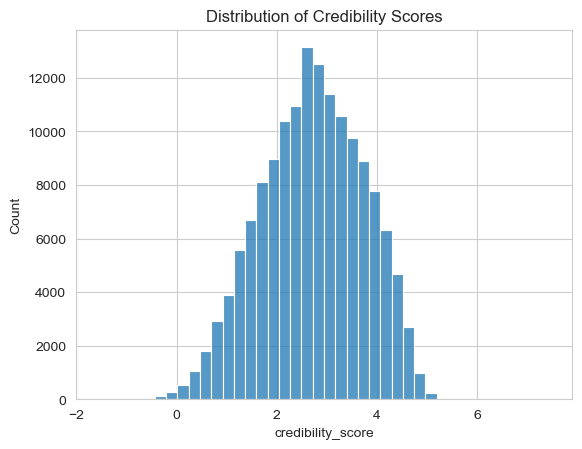

In [90]:
sns.histplot(data=business_df, x='credibility_score', bins=40);
plt.title('Distribution of Credibility Scores');

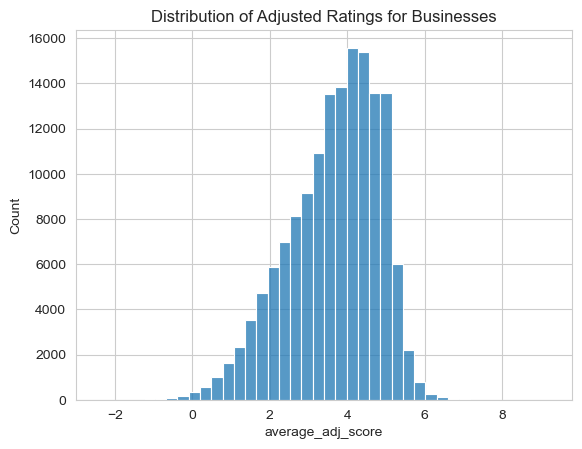

In [89]:
sns.histplot(data=business_df, x='average_adj_score', bins=40);
plt.title('Distribution of Adjusted Ratings for Businesses');

In [16]:
review_df = pd.DataFrame(list(REVIEWS.find({},{'adjusted_score': 1, 'stars': 1})))

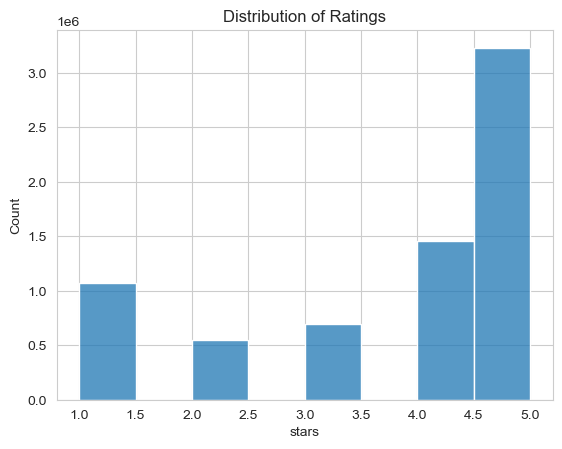

In [87]:
sns.histplot(data=review_df, x='stars', binwidth=.5);
plt.title("Distribution of Ratings");

In [72]:
BBox = ((business_df.longitude.min(),   business_df.longitude.max(),
         business_df.latitude.min(), business_df.latitude.max()))

In [79]:
img = plt.imread('images/map.png')

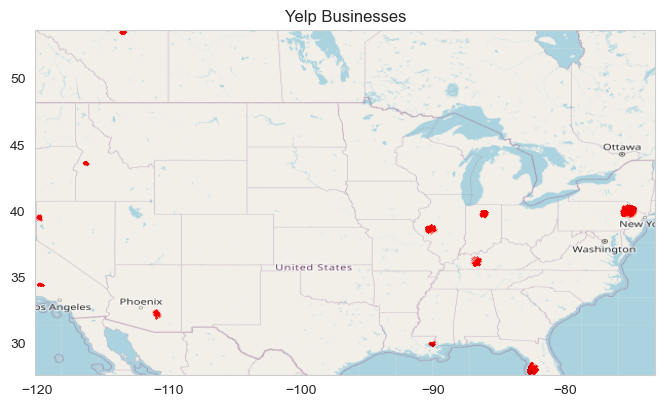

In [80]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(business_df.longitude, business_df.latitude, zorder=1, alpha=.1, c='r', s=0.01)
ax.set_title('Yelp Businesses')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(img, zorder=0, extent = BBox, aspect= 'equal')
plt.grid(False)